Sklearn Implementation of Problem 2 (Regression)

Importing Libraries

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt


Loading and splitting dataset

In [2]:
df = pd.read_csv("California_Houses.csv")
print(df.head())
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_data_size = int(0.7 * len(df))
validation_data_size = int(0.15 * len(df))
test_data_size = len(df) - train_data_size - validation_data_size

train_data = df[:train_data_size]
validation_data = df[train_data_size:train_data_size + validation_data_size]
test_data = df[train_data_size + validation_data_size:]

X_train = train_data.drop(columns=['Median_House_Value'])
y_train = train_data['Median_House_Value']
X_val = validation_data.drop(columns=['Median_House_Value'])
y_val = validation_data['Median_House_Value']
X_test = test_data.drop(columns=['Median_House_Value'])
y_test = test_data['Median_House_Value']

   Median_House_Value  Median_Income  Median_Age  Tot_Rooms  Tot_Bedrooms  \
0            452600.0         8.3252          41        880           129   
1            358500.0         8.3014          21       7099          1106   
2            352100.0         7.2574          52       1467           190   
3            341300.0         5.6431          52       1274           235   
4            342200.0         3.8462          52       1627           280   

   Population  Households  Latitude  Longitude  Distance_to_coast  \
0         322         126     37.88    -122.23        9263.040773   
1        2401        1138     37.86    -122.22       10225.733072   
2         496         177     37.85    -122.24        8259.085109   
3         558         219     37.85    -122.25        7768.086571   
4         565         259     37.85    -122.25        7768.086571   

   Distance_to_LA  Distance_to_SanDiego  Distance_to_SanJose  \
0   556529.158342         735501.806984         67432.5170

Normal Linear Regression

In [3]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
lr_mse = mean_squared_error(y_val, y_pred_lr)
mae = mean_absolute_error(y_val, y_pred_lr)
print(f"Linear Regression MSE: {lr_mse:.4f}")
print(f"Linear Regression MAE: {mae:.4f}")

Linear Regression MSE: 4575337829.5003
Linear Regression MAE: 49755.4667


Ridge Regression

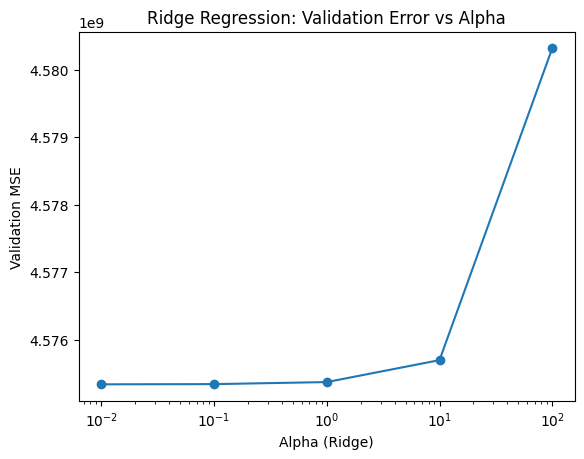

Best Ridge alpha: 0.01
Best Ridge MSE: 4575338162.9869


In [4]:

ridge_alphas = [0.01, 0.1, 1, 10, 100]
ridge_errors = []
for a in ridge_alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    y_pred_ridge = ridge.predict(X_val)
    ridge_errors.append(mean_squared_error(y_val, y_pred_ridge))

plt.plot(ridge_alphas, ridge_errors, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Ridge)')
plt.ylabel('Validation MSE')
plt.title('Ridge Regression: Validation Error vs Alpha')
plt.show()

best_ridge_index = ridge_errors.index(min(ridge_errors))
best_ridge_alpha = ridge_alphas[best_ridge_index]
best_ridge_mse = ridge_errors[best_ridge_index]

print(f"Best Ridge alpha: {best_ridge_alpha}")
print(f"Best Ridge MSE: {best_ridge_mse:.4f}")

Lasso Regression

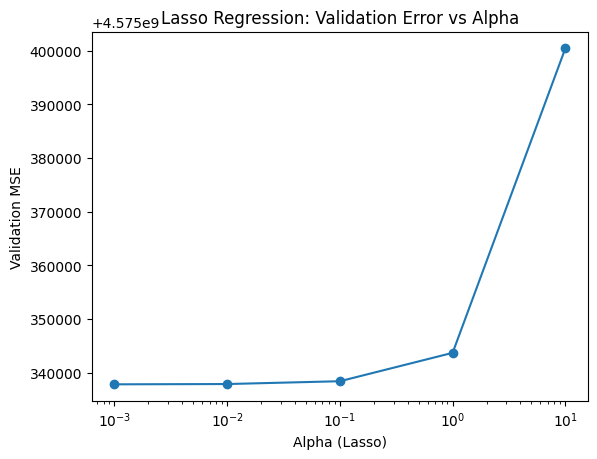

Best Lasso alpha: 0.001
Best Lasso MSE: 4575337835.3279


In [5]:



lasso_alphas = [0.001, 0.01, 0.1, 1, 10]
lasso_errors = []
for a in lasso_alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_pred_lasso = lasso.predict(X_val)
    lasso_errors.append(mean_squared_error(y_val, y_pred_lasso))

plt.plot(lasso_alphas, lasso_errors, marker='o')
plt.xscale('log')
plt.xlabel('Alpha (Lasso)')
plt.ylabel('Validation MSE')
plt.title('Lasso Regression: Validation Error vs Alpha')
plt.show()
best_lasso_index = lasso_errors.index(min(lasso_errors))
best_lasso_alpha = lasso_alphas[best_lasso_index]
best_lasso_mse = lasso_errors[best_lasso_index]

print(f"Best Lasso alpha: {best_lasso_alpha}")
print(f"Best Lasso MSE: {best_lasso_mse:.4f}")